In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from IPython.display import Image
import mplhep as hep
hep.style.use('ATLAS')
import os
from tqdm import tqdm
import h5py
import pandas

In [2]:
# 导入实验结果
data_exp0_20 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_0_20.dat')
data_exp20_40 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_20_40.dat')
data_exp40_60 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_40_60.dat')
data_exp60_80 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_60_80.dat')
data_exp80_100 = np.loadtxt('./data/dAu_mult_centrality_Data_200GeVdAu_centrality_80_100.dat')

data_exp = np.array([data_exp0_20,data_exp20_40,data_exp40_60,data_exp60_80,data_exp80_100])


In [3]:
# def plot_dNdEta(m=0, n=20, eta_flat='1p0', eta_gw='1p3', event_range=[0, 300],
#                 para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
#                 mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=16, 
#                 HWF_or_DWF='HWF', color='blue', plot_errbar='True'):
#     """
#     优化后的绘制 dN/dη 图的函数，适用于所有事件数据横坐标相同的情况。
#     - 只需对所有事件的纵坐标求平均即可。
#     """
# #     titletext = 'ebe: ' + convert_label(para)
    

#     # 根据模式确定文件路径和文件名
#     if mode_MC_SMOOTH == 'MC':    #5.5 + 0.5/0.4 + 3 
#         input_dir = f"/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}_nsamples/hydro_result/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#         input_filename = "dNdEta_mc_charged.dat"
#     elif mode_MC_SMOOTH == 'MC2': #5.4 + 0.35 + 3
#         input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#         input_filename = "dNdEta_mc_charged.dat"
#     elif mode_MC_SMOOTH == 'MC3': #5.4 + 0.33 + n_{BC}
#         input_dir = f"/media/mengzhu/MZ/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result_n_BC/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#         input_filename = "dNdEta_mc_charged.dat"
#     elif mode_MC_SMOOTH == 'MC4': #5.5 + 0.35 + n_{BC}
#         input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result_n_BC/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#         input_filename = "dNdEta_mc_charged.dat"
#     elif mode_MC_SMOOTH == 'MC5':  #5.5 + 0.35 + 3 
#         input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}_nsamples/hydro_result/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#         input_filename = "dNdEta_mc_charged.dat"
#     elif mode_MC_SMOOTH == 'SMOOTH':
#         input_dir = f"/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/ebe_smooth/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
#         input_filename = "dNdEta_Charged.dat"
    
#     # 初始化变量
#     all_data = []
#     event_count = 0

#     # 遍历文件并加载数据
#     for i in range(event_range[0], event_range[1]):
#         input_path = os.path.join(input_dir, f"event{i}", input_filename)
#         try:
#             dNdEta = np.loadtxt(input_path)
#             if len(all_data) == 0:  # 初始化 all_data
#                 all_data = dNdEta[:, 1]  # 只存储纵坐标
#                 x_values = dNdEta[:, 0]  # 横坐标（假设所有事件相同）
#             else:
#                 all_data += dNdEta[:, 1]  # 累加纵坐标
#             event_count += 1
#         except Exception as e:
#             print(f"无法处理文件 {input_path}: {e}")

#     # 确保有数据可用
#     if event_count > 0:
# #         print(f"totall events = {event_count}")
#         # 计算平均值和标准误差
#         bin_means = all_data / event_count  # 平均值
# #         std_error = np.sqrt(all_data / event_count) / np.sqrt(event_count)  # 标准误差（假设泊松分布）
#         std_error = 1 / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        

#         # 绘图
#         if plot_errbar:
#             plt.errorbar(x_values, coef * bin_means, yerr=coef * std_error*bin_means, fmt='-', color=color)
#         else:
#             plt.plot(x_values, coef * bin_means, color=color)

#         plt.xlabel(r"$\rm \eta$", fontsize=fontsize, ha='center')
#         plt.ylabel(r"$\rm dN/d\eta$", fontsize=fontsize, ha='center')
# #         plt.title(titletext, fontsize=fontsize)
#         plt.xlim(-8, 8)
# #         plt.grid(True)
# #         plt.show()
#     else:
#         print("没有找到可处理的文件。")


In [4]:
def plot_dNdEta(m=0, n=20, eta_flat='1p0', eta_gw='1p3', event_range=[0, 300],
                para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
                mode_MC_SMOOTH="MC", nsampling=2000, coef=1, fontsize=16, 
                HWF_or_DWF='HWF', color='blue', plot_errbar=False):
    """
    优化后的绘制 dN/dη 图的函数，适用于所有事件数据横坐标相同的情况。
    - 只需对所有事件的纵坐标求平均即可。
    """
#     titletext = 'ebe: ' + convert_label(para)
    

    # 根据模式确定文件路径和文件名
    if mode_MC_SMOOTH == 'MC': # loss 3.0
        input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
        input_filename = "dNdEta_mc_charged.dat"
    if mode_MC_SMOOTH == 'MC2':# loss n_BC
        input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result_n_BC/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
        input_filename = "dNdEta_mc_charged.dat"

    elif mode_MC_SMOOTH == 'SMOOTH':
        input_dir = f"/media/mengzhu/74e6f585-9c67-40c0-a5e9-89fb98e77bab/home/mengzhu/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result/ebe_smooth/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
        input_filename = "dNdEta_Charged.dat"
    
    # 初始化变量
    all_data = []
    event_count = 0

    # 遍历文件并加载数据
    for i in range(event_range[0], event_range[1]):
        input_path = os.path.join(input_dir, f"event{i}", input_filename)
        try:
            dNdEta = np.loadtxt(input_path)
            if len(all_data) == 0:  # 初始化 all_data
                all_data = dNdEta[:, 1]  # 只存储纵坐标
                x_values = dNdEta[:, 0]  # 横坐标（假设所有事件相同）
            else:
                all_data += dNdEta[:, 1]  # 累加纵坐标
            event_count += 1
        except Exception as e:
            print(f"无法处理文件 {input_path}: {e}")

    # 确保有数据可用
    if event_count > 0:
#         print(f"totall events = {event_count}")
        # 计算平均值和标准误差
        bin_means = all_data / event_count  # 平均值
#         std_error = np.sqrt(all_data / event_count) / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        std_error = 1 / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        

        # 绘图
        if plot_errbar:
            plt.errorbar(x_values, coef * bin_means, yerr=coef * std_error*bin_means, fmt='-', color=color)
        else:
            plt.plot(x_values, coef * bin_means, color=color)

        plt.xlabel(r"$\rm \eta$", fontsize=fontsize, ha='center')
        plt.ylabel(r"$\rm dN/d\eta$", fontsize=fontsize, ha='center')
#         plt.title(titletext, fontsize=fontsize)
        plt.xlim(-8, 8)
#         plt.grid(True)
#         plt.show()
    else:
        print("没有找到可处理的文件。")


In [5]:
def plot_hydro_all(
    eta_flat='1p3',eta_gw='1p3',
    para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
    mode='SMOOTH', nsampling=2000, event_range=[0,300],plot_errbar=True,label_para="para 1",
    HWF_or_DWF='HWF',coef=1,fontsize=16, save_fig=False):
    
    # 用P_factor 、beta命名文件
    parts = para.split('_')
    P_factor = parts[13] # 第13部分是 P_factor 的值
    beta = parts[17]     # 第17部分是 beta 的值
    
    
    # 颜色列表，用于每个中心度的线条和散点保持一致
    colors = ['red','blue', 'green', 'orange', 'black', 'purple', 'cyan']
    labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
    markers = ['o', '^', 'v', '*','s', 'D']

    # 绘图
    for idx, m in enumerate([0, 20, 40, 60,80]):
        # 绘制不同中心度范围的模拟数据，并确保颜色一致
        plot_dNdEta(m=m, n=m+20, para=para, eta_flat=eta_flat,eta_gw=eta_gw,HWF_or_DWF=HWF_or_DWF, 
                    event_range=event_range,nsampling=nsampling,plot_errbar=plot_errbar,
                    mode_MC_SMOOTH=mode, coef=coef,fontsize=fontsize, color=colors[idx])
        # 绘制实验结果，确保颜色与模拟数据一致
        plt.errorbar(data_exp[idx][:, 0], data_exp[idx][:, 2], yerr=[data_exp[idx][:, 4], data_exp[idx][:, 3]], 
                     fmt=markers[idx], ecolor=colors[idx], color=colors[idx], alpha=0.5, label=labels[idx])
        plt.legend(fontsize=fontsize)
        

    
    # 创建一个空的图例句柄
    empty_handle = plt.plot([], [], color='none', label=label_para, linestyle='')[0]

    # 绘制图例，包括空的图例句柄
#     plt.legend(handles=[empty_handle], loc='upper left')
    plt.legend(fontsize=fontsize)

    plt.gcf().set_size_inches(8, 6)  # 调整当前图形的大小为宽10英寸，高6英寸
    if save_fig:
        plt.savefig(f'fig/dNdeta_P_factor_{P_factor}_beta_{beta}.pdf', bbox_inches='tight', pad_inches=0.0)


    plt.show()  # 在最后显示所有图像

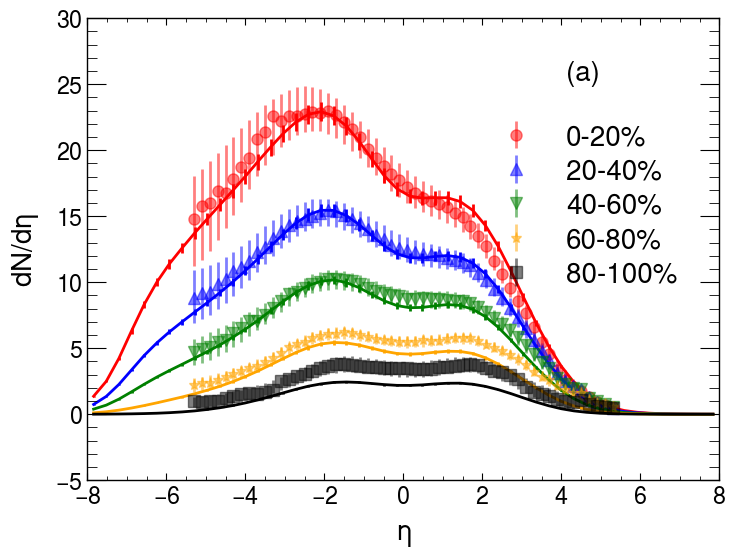

In [6]:
plot_hydro_all(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0",
    mode='MC',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para="(a)\n",
    eta_flat='1p3',eta_gw='1p3',coef=1,fontsize=20,save_fig=False)

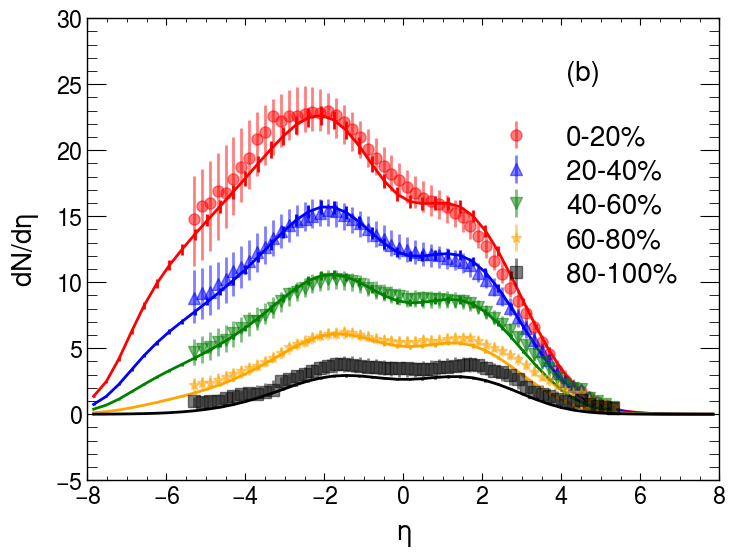

In [7]:
plot_hydro_all(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p4_y_loss_3p0",
    mode='MC',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para="(b)\n",
    eta_flat='1p3',eta_gw='1p3',coef=1,fontsize=20,save_fig=False)

In [8]:
def plot_hydro_all_mark(
    eta_flat='1p3',eta_gw='1p3',
    para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
    mode='SMOOTH', nsampling=2000, event_range=[0,300],plot_errbar=False,label_para="para 1",
    HWF_or_DWF='HWF',coef=1,fontsize=16, save_fig=False):
    
    # 用P_factor 、beta命名文件
    parts = para.split('_')
    if len(parts)==21:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = parts[20]     # 第17部分是 delta_eta 的值
    elif len(parts)==18:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = 'n_BC'     # 第17部分是 delta_eta 的值
    
    # 颜色列表，用于每个中心度的线条和散点保持一致
    colors = ['red','blue', 'green', 'orange', 'black', 'purple', 'cyan']
    labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
    markers = ['o', '^', 'v', '*','s', 'D']

    # 绘图
    for idx, m in enumerate([0, 20, 40, 60,80]):
        # 绘制不同中心度范围的模拟数据，并确保颜色一致
        plot_dNdEta(m=m, n=m+20, para=para, eta_flat=eta_flat,eta_gw=eta_gw,HWF_or_DWF=HWF_or_DWF, 
                    event_range=event_range,nsampling=nsampling,plot_errbar=plot_errbar,
                    mode_MC_SMOOTH=mode, coef=coef,fontsize=fontsize, color=colors[idx])
        # 绘制实验结果，确保颜色与模拟数据一致
        plt.errorbar(data_exp[idx][:, 0], data_exp[idx][:, 2], yerr=[data_exp[idx][:, 4], data_exp[idx][:, 3]], 
                     fmt=markers[idx], ecolor=colors[idx], color=colors[idx], alpha=0.5, label=labels[idx])
        plt.legend(fontsize=fontsize)

    # 添加标识
    plt.text(0.05, 0.95, label_para[0], transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.15, 0.95, fr'$ \beta$={label_para[1]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.30, 0.95, fr'$ \Delta \eta$={label_para[2]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')

    plt.gcf().set_size_inches(8, 6)  # 调整当前图形的大小为宽10英寸，高6英寸
    if save_fig:
        plt.savefig(f'fig/dNdeta_P_factor_{P_factor}_beta_{beta}_delta_eta_{delta_eta}_new.pdf', bbox_inches='tight', pad_inches=0.0)

    plt.show()  # 在最后显示所有图像

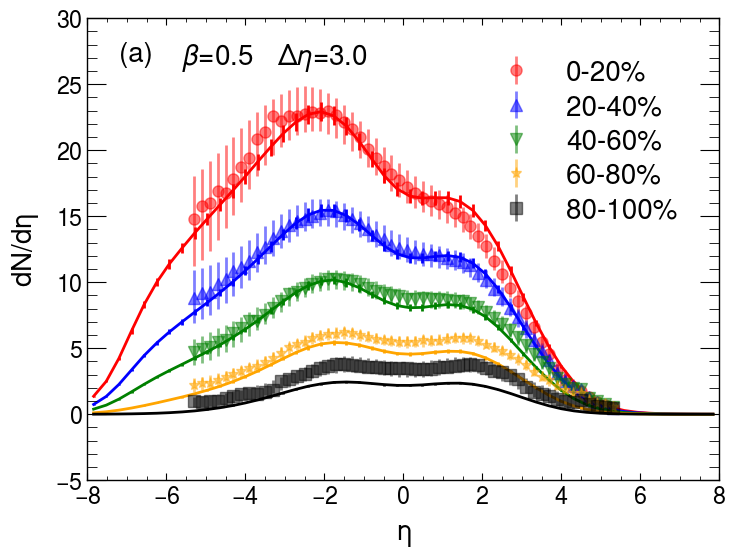

In [9]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p5_y_loss_3p0",
    mode='MC',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para=["(a)\n",'0.5','3.0'],
    eta_flat='1p3',eta_gw='1p3',coef=1,fontsize=20,save_fig=False)

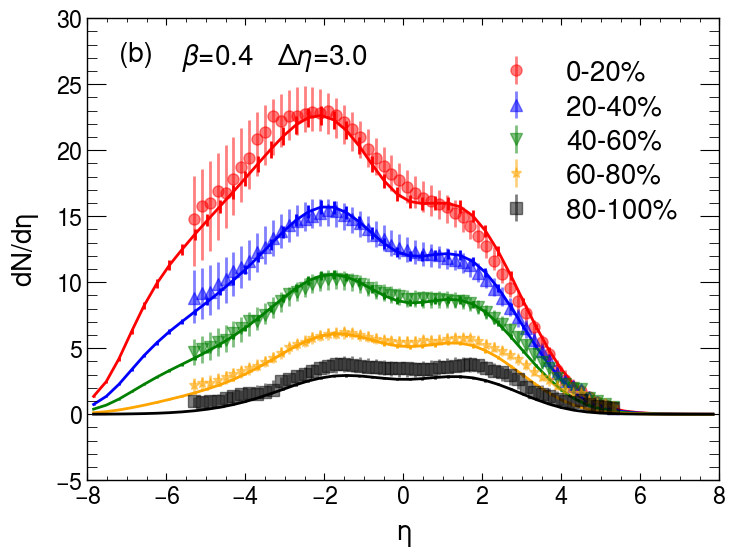

In [10]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p4_y_loss_3p0",
    mode='MC',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para=["(b)\n",'0.4','3.0'],
    eta_flat='1p3',eta_gw='1p3',coef=1,fontsize=20,save_fig=False)

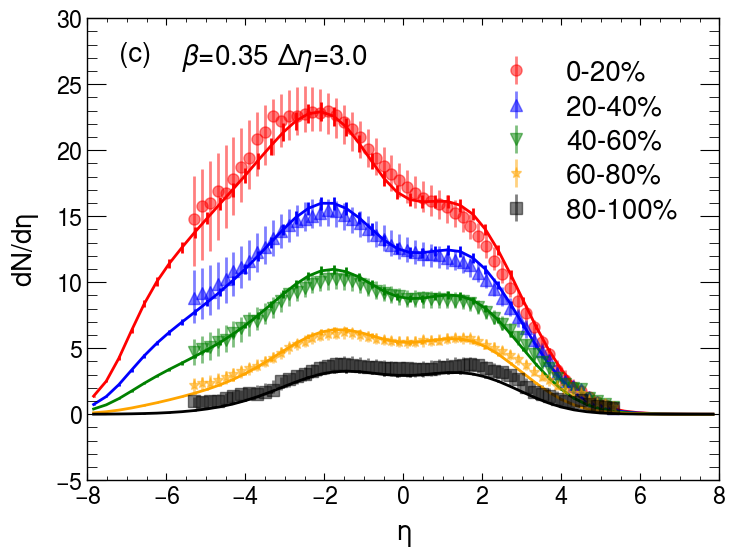

In [11]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35_y_loss_3p0",
    mode='MC',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para=["(c)\n",'0.35','3.0'],
    eta_flat='1p3',eta_gw='1p3',coef=1,fontsize=20,save_fig=False)

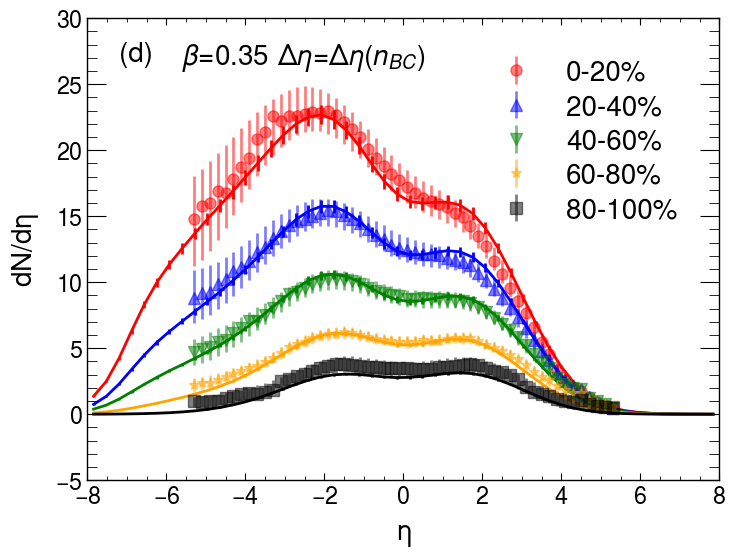

In [12]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
    mode='MC2',HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para=["(d)\n",'0.35','$ \Delta \eta(n_{BC})$'],
    eta_flat='1p3',eta_gw='1p3',coef=1,fontsize=20,save_fig=False)